Error:  (np.float64(0.0047411148410237015), 82127)


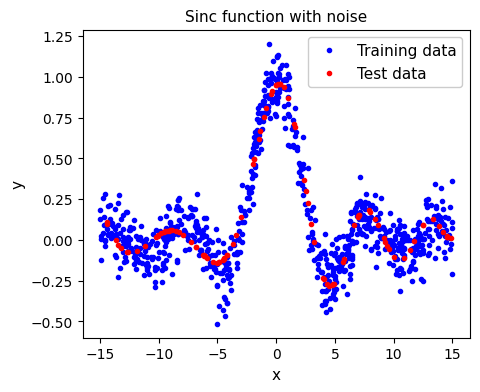

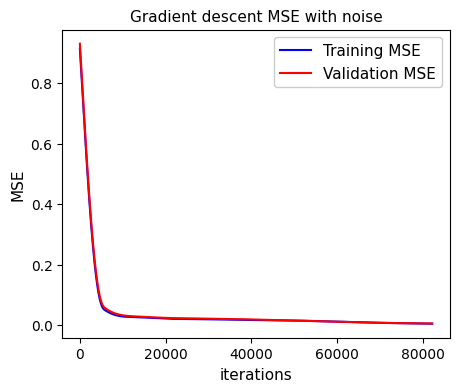

In [2]:
"""
Sinc Function Data Generation and SQQNN Training
This script generates synthetic data using the sinc function, trains a quantum-inspired network,
and visualizes the results.
"""

from QNetwork import *
import matplotlib.pyplot as plt
import random
import numpy as np

def sinc_function(min_x, max_x, n, opt, pv, ptt):
    """
    Generate synthetic data using the sinc function with optional noise.
    
    Args:
        min_x (float): Minimum x value
        max_x (float): Maximum x value  
        n (int): Total number of samples
        opt (int): Option flag (1=with noise, 0=without noise)
        pv (float): Percentage of validation samples
        ptt (float): Percentage of test samples
        
    Returns:
        tuple: (xt, yt, xv, yv, xtt, ytt, nt, nv, ntt)
            - xt: Training features
            - yt: Training targets
            - xv: Validation features
            - yv: Validation targets
            - xtt: Test features
            - ytt: Test targets
            - nt: Number of training samples
            - nv: Number of validation samples
            - ntt: Number of test samples
    """
    # Calculate number of samples for each set
    nv = int(np.round(pv * n))
    ntt = int(np.round(ptt * n))
    nt = n - nv - ntt
    
    # Initialize arrays
    xt = np.zeros((nt, 1))
    xv = np.zeros((nv, 1))
    xtt = np.zeros((ntt, 1))
    
    # Generate random x values for each set
    for i in range(0, nt):
        xt[i] = random.random() * (max_x - min_x) + min_x
    for i in range(0, nv):
        xv[i] = random.random() * (max_x - min_x) + min_x    
    for i in range(0, ntt):
        xtt[i] = random.random() * (max_x - min_x) + min_x

    # Sort the values
    xt = np.sort(xt)
    xv = np.sort(xv)
    xtt = np.sort(xtt)
    
    # Generate sinc function values
    if opt == 1:
        # With added Gaussian noise
        yt = np.sin(xt) / xt
        yv = np.sin(xv) / xv
        ytt = np.sin(xtt) / xtt
        
        for i in range(0, nt):
            yt[i] += 0.1 * np.random.normal(loc=0, scale=1, size=1)
        for i in range(0, nv):
            yv[i] += 0.1 * np.random.normal(loc=0, scale=1, size=1)
        for i in range(0, ntt):
            ytt[i] += 0.1 * np.random.normal(loc=0, scale=1, size=1) 
    else:
        # Without noise
        yt = np.sin(xt) / xt
        yv = np.sin(xv) / xv
        ytt = np.sin(xtt) / xtt

    # Normalize x values to [-1, 1] range
    xt = 2 * ((xt - min_x) / (max_x - min_x)) - 1
    xv = 2 * ((xv - min_x) / (max_x - min_x)) - 1
    xtt = 2 * ((xtt - min_x) / (max_x - min_x)) - 1
    
    return xt, yt, xv, yv, xtt, ytt, nt, nv, ntt

# Set random seed for reproducibility
np.random.seed(444)

# Configuration parameters
nf = 1  # Noise flag (1=with noise)
n = 1000  # Total number of samples
min_x = -15  # Minimum x value
max_x = 15  # Maximum x value

# Generate data
xt, yt, xv, yv, xtt, ytt, nt, nv, ntt = sinc_function(min_x, max_x, n, nf, 0.1, 0.1)

# Initialize and train SQQNN
qrn = QNetwork(xt, yt, xv, yv, 1)  # 1 neuron
error = qrn.fit_gradient_descent_MEAN_SQUARED(100000, 1, 0.1, 0.1, False)
print("Error: ", error)

# Make predictions on test set
yh = qrn.predict(xtt)

# Plotting parameters
s = 11  # Font size
# Plot 1: Sinc function with predictions
plt.figure(figsize=(5, 4))
if(nf == 1):
    plt.title('Sinc function with noise', fontsize=s)
else:
    plt.title('Sinc function without noise', fontsize=s)    
    
plt.plot(0.5 * (max_x - min_x) * xt, yt, 'b.', label='Training data')
plt.plot(0.5 * (max_x - min_x) * xtt, yh, 'r.', label='Test data')
plt.legend(fontsize=s, loc='upper right', title="", 
           facecolor='white', framealpha=1, title_fontsize=s)
plt.xlabel('x', fontsize=s)
plt.ylabel('y', fontsize=s)
#plt.savefig("sinc_function.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Training and validation errors
et, ev = qrn.get_errors()
plt.figure(figsize=(5, 4))
if(nf == 1):
    plt.title('Gradient descent MSE with noise', fontsize=s)
else:
    plt.title('Gradient descent MSE without noise', fontsize=s)
    
plt.plot(ev, 'b', label='Training MSE')
plt.plot(et, 'r', label='Validation MSE')
plt.legend(fontsize=s, loc='upper right', title="", 
           facecolor='white', framealpha=1, title_fontsize=s)
plt.xlabel('iterations', fontsize=s)
plt.ylabel('MSE', fontsize=s)
#plt.savefig("sinc_error.png", dpi=300, bbox_inches='tight')
plt.show()